In [39]:
import snap

In [40]:
%load_ext autoreload
%autoreload 2

import winsor_q2_bowtie_structure_methods as winsor2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
import matplotlib.pyplot as plt

In [42]:
g_epinions, g_email = winsor2.read_graphs(toy=False)

print("g_epinions N={} E={}".format(g_epinions.GetNodes(), g_epinions.GetEdges()))
print("g_email N={} E={}".format(g_email.GetNodes(), g_email.GetEdges()))

g_epinions N=75879 E=508837
g_email N=265214 E=420045


In [43]:
def print_results(args):
    g_name = args[0]
    node = args[1]
    to_list = args[2]
    from_list = args[3]
    component_list = args[4]

    print("{} node {} can reach {} and can be reached by {}. It's component has {} nodes.".format(
        g_name,
        node,
        len(to_list),
        len(from_list),
        len(component_list)))

print_results(winsor2.consider_node("Epinions", g_epinions, 9809))
print_results(winsor2.consider_node("Epinions", g_epinions, 1952))
print_results(winsor2.consider_node("EU Email", g_email, 189587))
print_results(winsor2.consider_node("EU Email", g_email, 675))
    
print("\nWe conclude:")
print("Epinions 9809 is a member of the OUT component.  There is a tendril to which it is linked")
print("Epinions 1952 is a menmber of the IN component.  There is a tendral that is linked to it")
print("EU Email 189587 is a member of the SCC component.")
print("EU Email 675 is a member of the OUT component.  There is a tendril to which it is linked")

Epinions node 9809 can reach 1 and can be reached by 56460. It's component has 1 nodes.
Epinions node 1952 can reach 47677 and can be reached by 1. It's component has 1 nodes.
EU Email node 189587 can reach 52103 and can be reached by 185226. It's component has 34203 nodes.
EU Email node 675 can reach 1 and can be reached by 185240. It's component has 1 nodes.

We conclude:
Epinions 9809 is a member of the OUT component.  There is a tendril to which it is linked
Epinions 1952 is a menmber of the IN component.  There is a tendral that is linked to it
EU Email 189587 is a member of the SCC component.
EU Email 675 is a member of the OUT component.  There is a tendril to which it is linked


In [86]:
def chart_reachability(gname, technique, values_list):
    import numpy as np

    x = np.linspace(0,1,len(values_list))
    values_list.sort()

    fig, ax1 = plt.subplots()
    ax1.set_title("Whatever!")
    ax1.set_yscale('log')

    plt.scatter(x, values_list)
    plt.xlabel('Fraction of Starting Nodes')
    plt.ylabel('Number of Nodes Reached')
    plt.title('Reachability of {} using {}'.format(gname, technique))
    # plt.legend()
    plt.show()


In [ ]:
Rnd = snap.TRnd(42)
Rnd.Randomize()

In [88]:
N = 100
list_out = [None] * N
list_in = [None] * N
for n in range(N):
    NId = g_epinions.GetRndNId(Rnd)
    list_out[n] = len(winsor2.get_set_of_nodes_from_n(g_epinions, NId))
    list_in[n] = len(winsor2.get_set_of_nodes_to_n(g_epinions, NId))

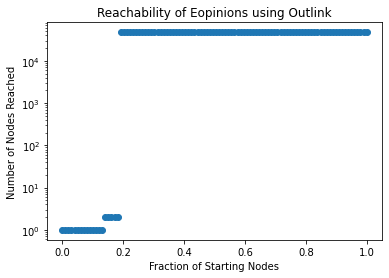

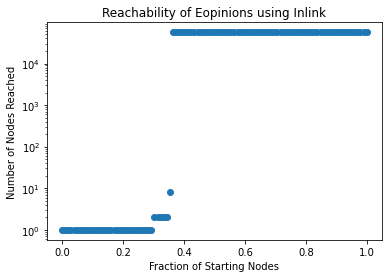

In [89]:
chart_reachability("Eopinions", "Outlink", list_out)
chart_reachability("Eopinions", "Inlink", list_in)

In [84]:
N = 100
list_out = [None] * N
list_in = [None] * N
for n in range(N):
    NId = g_email.GetRndNId(Rnd)
    list_out[n] = len(winsor2.get_set_of_nodes_from_n(g_email, NId))
    list_in[n] = len(winsor2.get_set_of_nodes_to_n(g_email, NId))

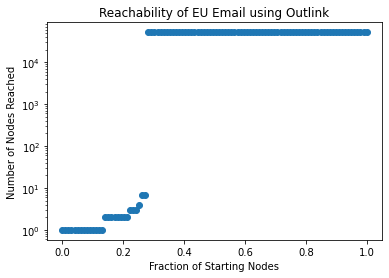

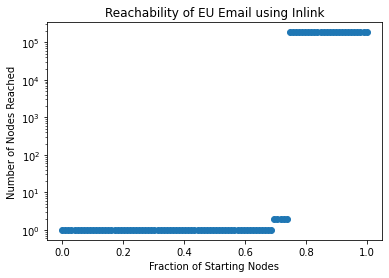

In [87]:
chart_reachability("EU Email", "Outlink", list_out)
chart_reachability("EU Email", "Inlink", list_in)

# HERE